## Imports

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import math

# Change system path to base directory.
sys.path.append("..")
from preprocessing.preprocessor import Preprocessor
from datasets.fake_news_detection import FakeNewsDetectionDataset

## Read test and train datasets

In [10]:
train = pd.read_csv('../raw_data/fulltrain.csv', header=None)
test = pd.read_csv('../raw_data/balancedtest.csv', header=None)
train.columns=['label', 'text']
test.columns=['label', 'text']
print(train.head())
print(test.head())

   label                                               text
0      1  A little less than a decade ago, hockey fans w...
1      1  The writers of the HBO series The Sopranos too...
2      1  Despite claims from the TV news outlet to offe...
3      1  After receiving 'subpar' service and experienc...
4      1  After watching his beloved Seattle Mariners pr...
   label                                               text
0      1  When so many actors seem content to churn out ...
1      1   In what football insiders are calling an unex...
2      1  In a freak accident following Game 3 of the N....
3      1  North Koreas official news agency announced to...
4      1  The former Alaska Governor Sarah Palin would b...


## Data distribution

3    17870
1    14047
4     9995
2     6942
Name: label, dtype: int64


<AxesSubplot:title={'center':'Distribution of train labels'}>

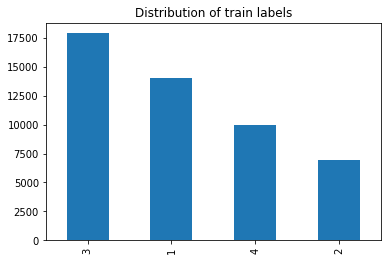

In [36]:
print(train['label'].value_counts())
train_counts = train['label'].value_counts()
train_counts.plot(kind = 'bar', title = 'Distribution of train labels')
# Imbalanced distribution of documents in each label

1    750
2    750
3    750
4    750
Name: label, dtype: int64


<AxesSubplot:title={'center':'Distribution of test labels'}>

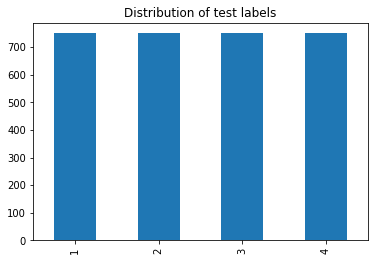

In [37]:
print(test['label'].value_counts())
test_counts = test['label'].value_counts()
test_counts.plot(kind = 'bar', title = 'Distribution of test labels')

## Data length

In [15]:
preprocessor = Preprocessor(perform_case_folding=True,
                            remove_stop_words=False,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
train['tokenized'] = train['text'].map(preprocessor.process)

In [23]:
train['num_words'] = train['tokenized'].map(len)
print('Longest article in training set: %s; shortest article in training set: %s'
    % (train['num_words'].max(), train['num_words'].min()))
# Large range in lengths of documents

Longest article in training set: 117687; shortest article in training set: 2
Longest article in test set: 10772; shortest article in test set: 5


## Words common in each category

In [65]:
preprocessor = Preprocessor(perform_case_folding=True,
                            remove_stop_words=True,
                            remove_punctuation=True,
                            perform_lemmatization=False,
                            perform_stemming=False)
training_dataset = FakeNewsDetectionDataset("../raw_data/fulltrain.csv",
        transform=preprocessor.process, target_transform=lambda x: int(x) - 1)

In [75]:
CATEGORIES = { 1: 'Satire', 2: 'Hoax', 3: 'Propaganda', 4: 'Reliable news' }
document_frequencies = pd.DataFrame.from_dict(training_dataset.document_frequencies, orient='index')
document_frequencies.columns = [1, 2, 3, 4]
document_frequencies['sum'] = document_frequencies.sum(axis='columns')
document_frequencies.head()

,1,2,3,4,sum
little,2364,433,3538,1172,7507
less,932,221,3346,1206,5705
decade,249,54,1061,415,1779
ago,1007,359,2923,1311,5600
hockey,104,4,22,56,186


In [76]:
document_frequencies.nlargest(10, ['sum'])

,1,2,3,4,sum
said,11847,1526,7164,7598,28135
one,5758,2525,10825,4433,23541
would,5355,1876,10112,4134,21477
time,6287,1831,8691,3263,20072
also,3704,1766,9551,4767,19788
people,3257,1884,10037,3640,18818
new,4115,1563,9067,4003,18748
like,4883,1604,9625,2391,18503
first,3330,1349,9160,3606,17445
even,4094,1139,9250,2250,16733


In [81]:
document_frequencies['satire'] = document_frequencies[1] / document_frequencies['sum']
document_frequencies['hoax'] = document_frequencies[2] / document_frequencies['sum']
document_frequencies['propaganda'] = document_frequencies[3] / document_frequencies['sum']
document_frequencies['reliable'] = document_frequencies[4] / document_frequencies['sum']
document_frequencies.head()

,1,2,3,4,sum,satire,hoax,propaganda,reliable
little,2364,433,3538,1172,7507,0.314906,0.057679,0.471293,0.156121
less,932,221,3346,1206,5705,0.163365,0.038738,0.586503,0.211394
decade,249,54,1061,415,1779,0.139966,0.030354,0.596402,0.233277
ago,1007,359,2923,1311,5600,0.179821,0.064107,0.521964,0.234107
hockey,104,4,22,56,186,0.559140,0.021505,0.118280,0.301075


In [111]:
reliable = document_frequencies[document_frequencies[4] > 500]
reliable.nlargest(10, ['reliable'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
taipei,2,0,3,745,750,0.002667,0.000000,0.004000,0.993333
nt,1,0,9,563,573,0.001745,0.000000,0.015707,0.982548
taiwanese,1,0,15,555,571,0.001751,0.000000,0.026270,0.971979
taiwan,3,2,52,1739,1796,0.001670,0.001114,0.028953,0.968263
--,89,1,46,3685,3821,0.023292,0.000262,0.012039,0.964407
ministry,23,31,432,853,1339,0.017177,0.023152,0.322629,0.637043
'the,2280,0,0,2825,5105,0.446621,0.000000,0.000000,0.553379
chinese,130,20,768,1128,2046,0.063539,0.009775,0.375367,0.551320
's,7326,0,0,8531,15857,0.462004,0.000000,0.000000,0.537996
'there,687,0,0,776,1463,0.469583,0.000000,0.000000,0.530417


In [112]:
satire = document_frequencies[document_frequencies[1] > 500]
satire.nlargest(10, ['satire'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
fucking,602,2,40,0,644,0.934783,0.003106,0.062112,0.000000
shit,642,11,105,0,758,0.846966,0.014512,0.138522,0.000000
'',1012,6,0,186,1204,0.840532,0.004983,0.000000,0.154485
'd,1470,0,0,479,1949,0.754233,0.000000,0.000000,0.245767
'and,1068,0,0,356,1424,0.750000,0.000000,0.000000,0.250000
'but,1562,0,0,590,2152,0.725836,0.000000,0.000000,0.274164
'll,1474,0,0,596,2070,0.712077,0.000000,0.000000,0.287923
'm,2025,0,0,838,2863,0.707300,0.000000,0.000000,0.292700
resident,1060,59,264,131,1514,0.700132,0.038970,0.174373,0.086526
'when,753,0,0,324,1077,0.699164,0.000000,0.000000,0.300836


In [108]:
hoax = document_frequencies[document_frequencies[2] > 500]
hoax.nlargest(10, ['hoax'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
commented,28,695,186,32,941,0.029756,0.738576,0.197662,0.034006
liberals,12,555,213,55,835,0.014371,0.664671,0.255090,0.065868
donald,160,1112,435,67,1774,0.090192,0.626832,0.245209,0.037768
trump,32,1282,727,20,2061,0.015526,0.622028,0.352741,0.009704
obamas,61,1069,1030,5,2165,0.028176,0.493764,0.475751,0.002309
...,393,1117,132,738,2380,0.165126,0.469328,0.055462,0.310084
muslim,50,720,671,165,1606,0.031133,0.448319,0.417808,0.102740
fox,156,622,515,125,1418,0.110014,0.438646,0.363188,0.088152
breaking,254,864,843,113,2074,0.122469,0.416586,0.406461,0.054484
hillary,97,866,991,155,2109,0.045993,0.410621,0.469891,0.073495


In [113]:
propaganda = document_frequencies[document_frequencies[3] > 500]
propaganda.nlargest(10, ['propaganda'])

,1,2,3,4,sum,satire,hoax,propaganda,reliable
globalist,0,0,793,0,793,0.0,0.0,1.0,0.0
linkwithin_text=related,0,0,3169,0,3169,0.0,0.0,1.0,0.0
turbeville,0,0,836,0,836,0.0,0.0,1.0,0.0
codex,0,0,831,0,831,0.0,0.0,1.0,0.0
alimentarius,0,0,828,0,828,0.0,0.0,1.0,0.0
turbevilles,0,0,752,0,752,0.0,0.0,1.0,0.0
ucytv,0,0,917,0,917,0.0,0.0,1.0,0.0
activistpost,0,0,810,0,810,0.0,0.0,1.0,0.0
sheeple,0,0,1142,0,1142,0.0,0.0,1.0,0.0
theantimedia.org,0,0,535,0,535,0.0,0.0,1.0,0.0
